In [1]:
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
with open("vietnam_travel_dataset.json", "r", encoding="utf-8") as f:
    data = json.load(f)

print(f"Total entries: {len(data)}")
print(f"Sample entry:\n{data[0]}")

Matplotlib is building the font cache; this may take a moment.


Total entries: 360
Sample entry:
{'id': 'city_hanoi', 'type': 'City', 'name': 'Hanoi', 'region': 'Northern Vietnam', 'description': 'Hanoi is located in Northern Vietnam. It’s known for its culture, food, heritage experiences, combining local culture, food, and history. Travelers often visit for authentic Vietnamese experiences, from exploring markets and temples to trying street food and scenic excursions.', 'best_time_to_visit': 'February to May', 'tags': ['culture', 'food', 'heritage'], 'semantic_text': 'Hanoi offers a mix of culture, food, heritage attractions and is a must-visit for those seeking immersive travel experiences in Vietnam.', 'connections': [{'relation': 'Connected_To', 'target': 'city_hue'}, {'relation': 'Connected_To', 'target': 'city_nha_trang'}]}


In [2]:
df = pd.DataFrame(data)

# 4. Basic statistics
print("\nTypes distribution:")
print(df['type'].value_counts())

print("\nCities distribution:")
print(df['city'].value_counts())




Types distribution:
type
Attraction    150
Hotel         100
Activity      100
City           10
Name: count, dtype: int64

Cities distribution:
city
Hanoi               35
Ha Long Bay         35
Sapa                35
Hue                 35
Hoi An              35
Da Nang             35
Nha Trang           35
Da Lat              35
Ho Chi Minh City    35
Mekong Delta        35
Name: count, dtype: int64


In [3]:
all_tags = [tag for sublist in df['tags'] for tag in sublist]
tag_counts = Counter(all_tags)
tag_df = pd.DataFrame(tag_counts.items(), columns=['tag', 'count']).sort_values(by='count', ascending=False)


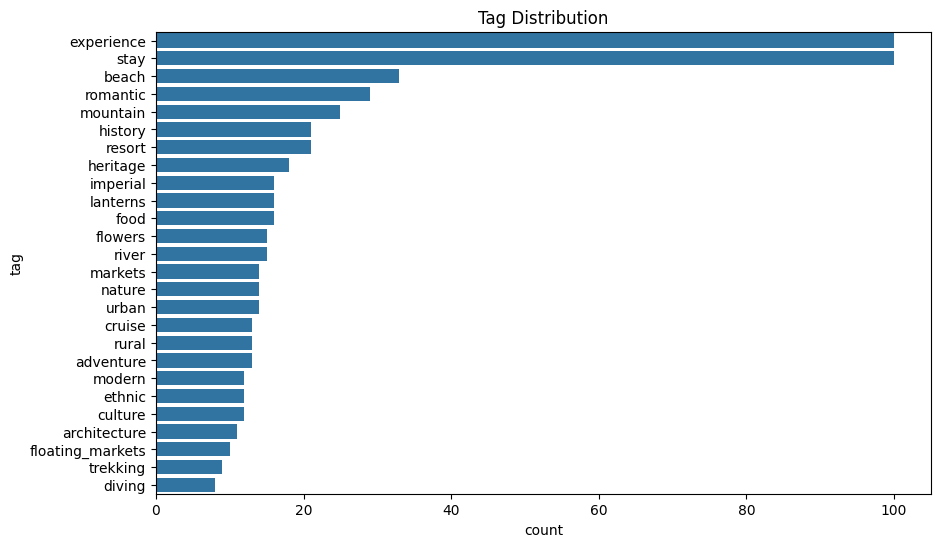

In [4]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='tag', data=tag_df)
plt.title("Tag Distribution")
plt.show()

In [5]:
city_type_counts = df.groupby(['city','type']).size().unstack(fill_value=0)
print("\nCity-wise count of Activities and Attractions:")
print(city_type_counts)


City-wise count of Activities and Attractions:
type              Activity  Attraction  Hotel
city                                         
Da Lat                  10          15     10
Da Nang                 10          15     10
Ha Long Bay             10          15     10
Hanoi                   10          15     10
Ho Chi Minh City        10          15     10
Hoi An                  10          15     10
Hue                     10          15     10
Mekong Delta            10          15     10
Nha Trang               10          15     10
Sapa                    10          15     10
